In [1]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()                           # apply the default seaborn theme, scaling, and color palette
%matplotlib inline
import matplotlib.pyplot as plt 

# Draft

In [1]:
# load data 
titanic_folder_path = "~/Google Drive/DataSets/"
titanic_train = pd.read_csv(titanic_folder_path + "titanic/train.csv", index_col='PassengerId')
titanic_test = pd.read_csv(titanic_folder_path + "titanic/test.csv", index_col='PassengerId')

NameError: name 'pd' is not defined

In [0]:
titanic_train.head()

## Column definitions: 
### SibSp: Number of Siblings/Spouses Aboard
### Parch: Number of Parents/Children Aboard
#### Some children travelled only with a nanny, therefore parch=0 for them
### Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) 

In [0]:
titanic_train.shape

In [0]:
# titanic_train:PassengerId of 1 to 892
traindex = titanic_train.index
traindex

In [0]:
# find the correlation among the columns
# titanic_train.corr(method ='pearson')

In [0]:
# titanic_test.tail()

In [0]:
titanic_test.shape

In [0]:
# titanic_test:PassengerId of 892 to 1309
testdex = titanic_test.index
testdex

# Merging train and test datasets

In [0]:
train_results = titanic_train["Survived"].copy()
titanic_train.drop("Survived", axis=1, inplace=True, errors="ignore")
titanic_raw = pd.concat([titanic_train, titanic_test], axis=0)
titanic_raw

### Transform categorial sex column 

In [0]:
# titanic_raw['Sex'] = titanic_raw['Sex'].astype('category') # prepare the Sex column as category column  
# titanic_raw['Sex'] = titanic_raw['Sex'].cat.codes #alphabetically labeled 0:1
# titanic_raw

# Handling missing values

In [0]:
titanic_raw.info()

# Age 
### There seems to be a correlation between Age and Title in the Name column.

In [0]:
with pd.option_context("display.max_rows", None):
    display(titanic_raw[['Name', 'Age']].sort_values('Age'))

In [0]:
# create a new feature to extract title names from the Name column
titanic_raw['Title'] = titanic_raw['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
titanic_raw['Title'].value_counts()

In [0]:
# normalize the titles
normalized_titles = {
    "Capt":         "Officer",
    "Col":          "Officer",
    "Major":        "Officer",
    "Dr":           "Officer",
    "Rev":          "Officer",
    "Jonkheer":     "Royalty",
    "Don":          "Royalty",
    "Sir":          "Royalty",
    "Dona":         "Royalty",
    "Lady":         "Royalty",
    "the Countess": "Royalty",
    "Mlle":         "Miss",
    "Miss":         "Miss",
    "Mme":          "Mrs",
    "Ms":           "Mrs",
    "Mrs":          "Mrs",
    "Master":       "Master",
    "Mr":           "Mr"   
}
# map the normalized titles to the current titles 
titanic_raw['Title'] = titanic_raw['Title'].map(normalized_titles)
# view value counts for the normalized titles
titanic_raw['Title'].value_counts()

In [0]:
# group by Sex, Pclass, and Title 
grouped = titanic_raw.groupby(['Sex', 'Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped['Age'].median()

In [0]:
# apply the grouped median value on the Age NaN
titanic_raw['Age'] = grouped['Age'].apply(lambda x: x.fillna(x.median()))
# titanic_raw['Age'] = titanic_raw['Age'].fillna(grouped['Age'].transform('median'))

### Fare and Embarked

In [0]:
# find most frequent Embarked value and store in variable
most_embarked = titanic_raw['Embarked'].value_counts().index[0]

# fill NaN with most_embarked value
titanic_raw['Embarked'] = titanic_raw['Embarked'].fillna(most_embarked)

# fill NaN with median fare
titanic_raw['Fare'] = titanic_raw['Fare'].fillna(titanic_raw['Fare'].median())

In [0]:
titanic_raw.info()

## Cabin
### Copy Cabin column from original dataset to manipulate it. At the end, the manipluated columns are merged into the original dataset and the original Cabin column is dropped.  

In [0]:
cabin_only = titanic_raw[['Cabin', 'Pclass']].copy()
# cabin_only['Cabin_Data'] = cabin_only['Cabin'].notnull()
# cabin_only['Cabin_Data']
# titanic['Cabin'][titanic['Cabin'].notnull()]
# cabin_only.sort_values('Cabin')

# with pd.option_context("display.max_rows", None):
#     display(cabin_only.sort_values('Pclass'))

In [0]:
# Percentage of cabin null values for 1st class: number of cabin null values over total number cabins in the specified class 
# cabin_only[cabin_only['Pclass'] == 1]['Cabin'].isnull().sum() / cabin_only[cabin_only['Pclass'] == 1]['Pclass'].count()*100

In [0]:
# Percentage of cabin null values for 2nd class: number of cabin null values over total number cabins in the specified class
# cabin_only[cabin_only['Pclass'] == 2]['Cabin'].isnull().sum() / cabin_only[cabin_only['Pclass'] == 2]['Pclass'].count()*100

In [0]:
# Percentage of cabin null values for 3rd class: number of cabin null values over total number cabins in the specified class
# cabin_only[cabin_only['Pclass'] == 3]['Cabin'].isnull().sum() / cabin_only[cabin_only['Pclass'] == 3]['Pclass'].count()*100

In [0]:
# total count of 1st class passengers
# cabin_only[cabin_only['Pclass'] == 1]['Pclass'].count()

In [0]:
# # total count of 2nd class passengers
# cabin_only[cabin_only['Pclass'] == 2]['Pclass'].count()

In [0]:
# # total count of 3rd class passengers
# cabin_only[cabin_only['Pclass'] == 3]['Pclass'].count()

In [0]:
# def remove(Cabin_list): 
#     Deck = []
#     pattern = '[0-9]'
#     for i in Cabin_list:
#         if i != 'nan':
#             Deck.append(''.join(set(re.sub(pattern, '', i))).strip())
#         else:
#             Deck.append(i) 
# return Deck

In [0]:
# titanic.query("Cabin == 'C23 C25 C27'")

# Extract Deck feature from Cabin 

In [0]:
# cabin_only['Deck'] = cabin_only['Cabin'].str.slice(0,1)
# cabin_only

In [0]:
# There are 7 compound cabins starting with F that all belong to Pclass==3! For convenience, these 7 occurences are considered by their first letter of F.
# cabin_only[(cabin_only['Deck'] == 'F') & (cabin_only['Pclass'] == 3)]

In [0]:
# Impute the 1014 (out of 1309) missing cabins with label X
# cabin_only['Deck'] = cabin_only['Deck'].fillna('X')
# Deck_only = cabin_only.drop(['Cabin', 'Pclass'], axis=1)
# Deck_only

# Transform Deck categorial column using onehot method

In [0]:
# Deck_only_onehot = Deck_only.copy()
# Deck_only_onehot = pd.get_dummies(Deck_only_onehot, columns=['Deck'], prefix=['Deck']) 
# Deck_only_onehot

In [0]:
# titanic_Deck = titanic_raw.copy()
# titanic_Deck = pd.concat([titanic_Deck, Deck_only_onehot], axis=1).drop(['Cabin'], axis=1)
# titanic_Deck

In [0]:
# titanic_Deck.info()

## 2. Age
### First transform the category using the LabelEncoding method

In [0]:
# titanic_Deck['Sex'] = titanic_Deck['Sex'].astype('category') # prepare the Sex column as category column  
# titanic_Deck['Sex'] = titanic_Deck['Sex'].cat.codes #alphabetically labeled 0:1
# titanic_Deck

In [0]:
# titanic_Deck['Age'].fillna(titanic_Deck.groupby(['Sex'])['Age'].transform('mean'), inplace = True)
# titanic_Deck.groupby(['Sex'])['Age'].agg(['mean', 'median'])

In [0]:
# ax = titanic_Deck.groupby(['Sex'])['Age'].plot(kind='hist', rwidth=0.5, legend=True)

In [0]:
# titanicSex = titanic_Deck 

In [0]:
# titanic_Deck.isnull().sum()

In [0]:
# ax = titanic_Deck['Age'].plot(kind='hist', rwidth=0.5)

In [0]:
# def remove(Cabin_list): 
#     Deck = []
#     pattern = '[0-9]'
#     for i in Cabin_list:
#         if i != 'nan':
#             Deck.append(''.join(set(re.sub(pattern, '', i))).strip())
#         else:
#             Deck.append(i) 
#     return Deck

In [0]:
# def remove(myList): 
#     # re.sub() deletes the pattern provided from the cabin name string.
#     # set() assures unique floor for each passenger.
#     # strip() removes the spacing in cabin name string.  
#     Deck = [i if i==np.nan else ''.join(set(re.sub('\d', '', i))).strip() for i in myList]
#     Room = [i if i==np.nan else int(''.join(filter(str.isdigit, i.split()[0]))) for i in myList]
#     return Deck, Room

In [0]:
# myList =['C23 C25 C27', 'A5', 'D10 D12']
# Deck, Room = remove(myList)
# print(Deck)
# print(Room)

In [0]:
# myStr = "T"
# myStr.split()[0]

In [0]:
# ''.join(filter(str.isdigit, myStr.split()[0]))

In [0]:
# ''.join(re.split(r"(?:(?!\d\d\d\d).)*(\d\d\d\d)", '', '09-70-1234')).strip()

In [0]:
# Deck, Room = remove(Cabin_list)
# Deck = remove(Cabin_list)

In [0]:
# with pd.option_context("display.max_rows", None):
#     display(cabin_only)

In [0]:
# titanic_train['SibSp'].value_counts()

In [0]:
# It is obvious that most passengers travelled without Siblings or Spouses.
# sns.distplot(titanic_train['SibSp'], kde=False);

In [0]:
# titanic_train['Parch'].value_counts()

In [0]:
# It is obvious that most passengers travelled without their Parents or Children.
# sns.distplot(titanic_train['Parch'], kde=False);

# Missing Values

In [0]:
# missing values distribution
# titanic_train.isnull().sum()

## Cabin

# Pclass roughly matches the decks: first class had the top decks (A-E), second class (D-F), and third class (E-G)

In [0]:
# Survived passengers
# with pd.option_context("display.max_rows", None):
#     display(titanic_train[['Pclass', 'SibSp','Parch','Cabin']][titanic_train['Survived'] == 1].sort_values('Pclass'))

In [0]:
# Unsurvived passengers
# with pd.option_context("display.max_rows", None):
#     display(titanic_train[['Pclass', 'SibSp','Parch','Cabin']][titanic_train['Survived'] == 0].sort_values('Pclass'))

# Final version 
# I. Data Wrangling and Preprocessing

In [2]:
# load data 
folder_path = "~/Google Drive/DataSets/"
train = pd.read_csv(folder_path + "titanic/train.csv", index_col='PassengerId')
test = pd.read_csv(folder_path + "titanic/test.csv", index_col='PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## - Column definitions: 
### _SibSp: Number of Siblings/Spouses abroad_
### _Parch: Number of Parents/Children abroad_
#### _Some children travelled only with a nanny, therefore parch=0 for them_
### _Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)_ 

## - Survival rate correlates very positively with the higher passenger class as expected.

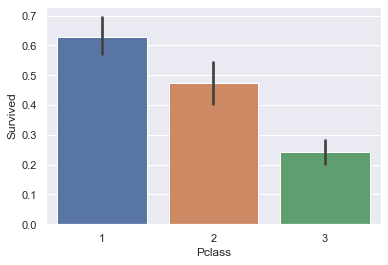

In [9]:
ax = sns.barplot(x='Pclass', y='Survived', data=train)

## - Survival rate correlates very positively with the female sex.

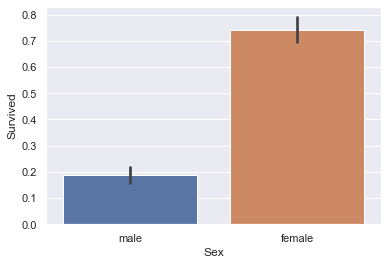

In [10]:
ax = sns.barplot(x='Sex', y='Survived', data=train)

## Passengers embarked on Cherbourg had meaningful higher survival rate; but why?!

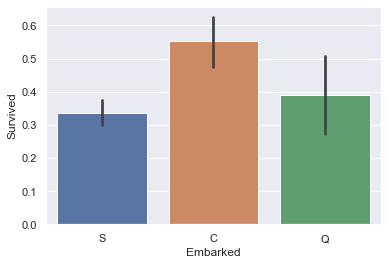

In [18]:
ax = sns.barplot(x='Embarked', y='Survived', data=train)

In [22]:
grouped = train.groupby(['Embarked', 'Pclass', 'Sex'])  
grouped['Pclass'].count()

Embarked  Pclass  Sex   
C         1       female     43
                  male       42
          2       female      7
                  male       10
          3       female     23
                  male       43
Q         1       female      1
                  male        1
          2       female      2
                  male        1
          3       female     33
                  male       39
S         1       female     48
                  male       79
          2       female     67
                  male       97
          3       female     88
                  male      265
Name: Pclass, dtype: int64

In [24]:
grouped['Age'].median()

Embarked  Pclass  Sex   
C         1       female    37.00
                  male      36.50
          2       female    22.00
                  male      29.50
          3       female    14.25
                  male      26.00
Q         1       female    33.00
                  male      44.00
          2       female    30.00
                  male      57.00
          3       female    20.00
                  male      27.00
S         1       female    33.00
                  male      42.00
          2       female    29.00
                  male      30.00
          3       female    23.00
                  male      25.00
Name: Age, dtype: float64

In [17]:
# Survived passengers
with pd.option_context("display.max_rows", None):
    display(train[['Pclass', 'SibSp','Parch','Cabin', 'Age', 'Ticket', 'Survived']].sort_values('Ticket', ascending=False))

,Pclass,SibSp,Parch,Cabin,Age,Ticket,Survived
PassengerId,,,,,,,
746,1,1,1,B22,70.00,WE/P 5735,0
541,1,0,2,B22,36.00,WE/P 5735,1
220,2,0,0,NaN,30.00,W/C 14208,0
93,1,1,0,E31,46.00,W.E.P. 5734,0
236,3,0,0,NaN,NaN,W./C. 6609,0
437,3,2,2,NaN,21.00,W./C. 6608,0
737,3,1,3,NaN,48.00,W./C. 6608,0
87,3,1,3,NaN,16.00,W./C. 6608,0
148,3,2,2,NaN,9.00,W./C. 6608,0


In [ ]:
# make a copy of Survived column of train file and drop it before merging with test file with no Survived column
train_survived = train["Survived"].copy()
train.drop("Survived", axis=1, inplace=True, errors="ignore")

# merge train and test
titanic = pd.concat([train, test], axis=0)

# create indexes to separate data later on 
train_idx = train.index
test_idx = test.index

# view head of data 
titanic.head()

In [3]:
# get info on features
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [6]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# - Handling missing values

### _Fare and Embarked features_

In [4]:
# find most frequent Embarked value and store in variable
most_embarked = titanic['Embarked'].value_counts().index[0]

# fill NaN with most_embarked value
titanic['Embarked'] = titanic['Embarked'].fillna(most_embarked)

# fill NaN with median fare
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

# fill Cabin NaN with U for unknown
titanic['Cabin'] = titanic['Cabin'].fillna('U')

# view changes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Cabin       1309 non-null object
Embarked    1309 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


## _Age_
#### A correlation between age and title or rank of a given person is very likely that can be used to fill age NULL values. For example, Master is used for male under 14 years of old. So, we extrcat titles from Name column.  

In [4]:
with pd.option_context("display.max_rows", None):
    display(titanic[['Name', 'Age']].sort_values('Age'))

,Name,Age
PassengerId,,
1246,"Dean, Miss. Elizabeth Gladys Millvina""""",0.17
1093,"Danbom, Master. Gilbert Sigvard Emanuel",0.33
804,"Thomas, Master. Assad Alexander",0.42
756,"Hamalainen, Master. Viljo",0.67
470,"Baclini, Miss. Helene Barbara",0.75
645,"Baclini, Miss. Eugenie",0.75
1173,"Peacock, Master. Alfred Edward",0.75
1199,"Aks, Master. Philip Frank",0.83
79,"Caldwell, Master. Alden Gates",0.83


In [5]:
# create a new feature (kind of feature engineering) to extract title names from the Name column
titanic['Title'] = titanic['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
titanic['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Lady              1
Jonkheer          1
Capt              1
the Countess      1
Don               1
Dona              1
Sir               1
Mme               1
Name: Title, dtype: int64

In [6]:
# normalize the titles
normalized_titles = {
    "Capt":         "Officer",
    "Col":          "Officer",
    "Major":        "Officer",
    "Dr":           "Officer",
    "Rev":          "Officer",
    "Jonkheer":     "Royalty",
    "Don":          "Royalty",
    "Dona":         "Royalty",
    "Sir":          "Royalty",
    "Lady":         "Royalty",
    "the Countess": "Royalty",
    "Mlle":         "Miss",
    "Miss":         "Miss",
    "Mme":          "Mrs",
    "Ms":           "Mrs",
    "Mrs":          "Mrs",
    "Master":       "Master",
    "Mr":           "Mr"   
}
# map the normalized titles to the current titles 
titanic['Title'] = titanic['Title'].map(normalized_titles)

# view value counts for the normalized titles
titanic['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

In [7]:
# group by Sex (as some titles depend on sex), Pclass (as some titles depend on class), and Title 
grouped = titanic.groupby(['Sex', 'Pclass', 'Title'])  

# view the median Age by the grouped features 
grouped['Age'].median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

In [8]:
# Not NULL Age values distribution among titles
grouped['Age'].apply(lambda x: x.notnull().sum())

Sex     Pclass  Title  
female  1       Miss        61
                Mrs         68
                Officer      1
                Royalty      3
        2       Miss        48
                Mrs         55
        3       Miss       103
                Mrs         49
male    1       Master       5
                Mr         132
                Officer     11
                Royalty      3
        2       Master      11
                Mr         137
                Officer     10
        3       Master      37
                Mr         312
Name: Age, dtype: int64

In [9]:
# Age NULL values distribution among titles
grouped['Age'].apply(lambda x: x.isnull().sum())

Sex     Pclass  Title  
female  1       Miss         1
                Mrs         10
                Officer      0
                Royalty      0
        2       Miss         2
                Mrs          1
        3       Miss        47
                Mrs         17
male    1       Master       0
                Mr          27
                Officer      1
                Royalty      0
        2       Master       0
                Mr          13
                Officer      0
        3       Master       8
                Mr         136
Name: Age, dtype: int64

In [10]:
# fill Age NULL values of each subgroup with the relevant median Age of that particular subgroup
titanic['Age'] = grouped['Age'].apply(lambda x: x.fillna(x.median()))

# view changes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 122.7+ KB


# II. Feature Engineering

##  -   FamilySize feature
### Use Parch and SibSp to create FamilySize feature with the rational that smaller family sizes were more likely to survive as it was easier to secure a spot on a life boat.   

In [11]:
# FamilySize feature engineering (including the passenger itself)
titanic['FamilySize'] = titanic['Parch'] + titanic['SibSp'] + 1

## - Deck feature
### Pclass roughly matches the decks: first class had the top decks (A-E), second class (D-F), and third class (E-G). It was more likely for residents of upper decks to survive as they were closer to life boats.   

In [13]:
titanic['Deck'] = titanic['Cabin'].map(lambda x: x[0])

TypeError: 'float' object is not subscriptable

In [14]:
# View changes
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Deck
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2,U
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1,U
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,C
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,1,U


## - Convert categorical features into dummy variables

In [15]:
# convert the male and female groups to integer form
titanic['Sex'] = titanic['Sex'].map({"female": 0, "male":1})

# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(titanic['Pclass'], prefix='Pclass') 
title_dummies = pd.get_dummies(titanic['Title'], prefix='Title')
deck_dummies = pd.get_dummies(titanic['Deck'], prefix='Deck') 
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked') 

# concatenate dummy columns with main dataset
titanic_dummies = pd.concat([titanic, pclass_dummies, title_dummies, deck_dummies, embarked_dummies], axis=1)

# drop categorical fields
titanic_dummies.drop(['Pclass', 'Title', 'Cabin', 'Deck', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

# view changes
titanic_dummies.head()

,Sex,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Title_Master,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,22.0,1,0,7.2500,2,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,38.0,1,0,71.2833,2,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,26.0,0,0,7.9250,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,35.0,1,0,53.1000,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,1,35.0,0,0,8.0500,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


#   III. Features selection

In [16]:
# create train and test data
train = titanic_dummies.loc[train_idx, :]
test = titanic_dummies.loc[test_idx, :]

# convert Survived column as integer back to train 
train['Survived'] = train_survived.astype(int)

# view changes
train

,Sex,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Title_Master,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_C,Embarked_Q,Embarked_S,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,22.0,1,0,7.2500,2,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,38.0,1,0,71.2833,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,26.0,0,0,7.9250,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
4,0,35.0,1,0,53.1000,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5,1,35.0,0,0,8.0500,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,1,27.0,0,0,13.0000,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
888,0,19.0,0,0,30.0000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
889,0,18.0,1,2,23.4500,4,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [40]:
# create X and y for feature and target values 
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [42]:
# create features correlation matrix thru standard Pearson method that assumes Normal distribution of each feature 
corr_pearson = train.corr('pearson')
corr_pearson

,Sex,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Title_Master,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_C,Embarked_Q,Embarked_S,Survived
Sex,1.000000,0.100952,-0.114631,-0.245489,-0.182333,-0.200988,-0.098013,-0.064746,0.137143,0.159934,...,-0.079248,-0.047003,-0.008202,-0.091031,0.024728,0.140391,-0.082853,-0.074115,0.119224,-0.543351
Age,0.100952,1.000000,-0.267801,-0.184627,0.125602,-0.275269,0.400953,0.021401,-0.362880,-0.391855,...,0.145891,0.121897,-0.080269,-0.071651,0.039066,-0.279046,0.052410,-0.107742,0.021889,-0.059594
SibSp,-0.114631,-0.267801,1.000000,0.414838,0.159651,0.890712,-0.054582,-0.055932,0.092548,0.349559,...,-0.017575,-0.036865,0.001706,-0.001402,-0.015907,0.040460,-0.059528,-0.026354,0.068734,-0.035322
Parch,-0.245489,-0.184627,0.414838,1.000000,0.216225,0.783111,-0.017633,-0.000734,0.015790,0.267344,...,-0.019125,-0.016554,0.023694,0.072388,-0.015878,-0.036987,-0.011069,-0.081228,0.060814,0.081629
Fare,-0.182333,0.125602,0.159651,0.216225,1.000000,0.217138,0.591711,-0.118557,-0.413333,0.010908,...,0.098878,0.053717,-0.033093,-0.025180,0.002224,-0.482075,0.269335,-0.117216,-0.162184,0.257307
FamilySize,-0.200988,-0.275269,0.890712,0.783111,0.217138,1.000000,-0.046114,-0.038594,0.071142,0.372472,...,-0.021566,-0.033466,0.013003,0.035206,-0.018804,0.009175,-0.046215,-0.058592,0.077359,0.016639
Pclass_1,-0.098013,0.400953,-0.054582,-0.017633,0.591711,-0.046114,1.000000,-0.288585,-0.626738,-0.084700,...,0.291218,0.242675,-0.068833,-0.037988,0.059256,-0.788773,0.296423,-0.155342,-0.161921,0.285904
Pclass_2,-0.064746,0.021401,-0.055932,-0.000734,-0.118557,-0.038594,-0.288585,1.000000,-0.565210,0.009903,...,-0.041325,-0.038864,0.122906,-0.034258,-0.017100,0.172413,-0.125416,-0.127301,0.189980,0.093349
Pclass_3,0.137143,-0.362880,0.092548,0.015790,-0.413333,0.071142,-0.626738,-0.565210,1.000000,0.064918,...,-0.217282,-0.177461,-0.040721,0.060612,-0.037138,0.539291,-0.153329,0.237449,-0.015104,-0.322308
Title_Master,0.159934,-0.391855,0.349559,0.267344,0.010908,0.372472,-0.084700,0.009903,0.064918,1.000000,...,-0.042519,-0.012717,0.109227,-0.014559,-0.007267,0.027841,-0.035225,0.010478,0.024264,0.085221


In [43]:
# create features correlation matrix thru Spearman’s Rank Correlation 
corr_spearman = train.corr('spearman')
corr_spearman

,Sex,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Title_Master,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_C,Embarked_Q,Embarked_S,Survived
Sex,1.000000,0.111772,-0.195204,-0.254512,-0.259593,-0.292035,-0.098013,-0.064746,0.137143,0.159934,...,-0.079248,-0.047003,-0.008202,-0.091031,0.024728,0.140391,-0.082853,-0.074115,0.119224,-0.543351
Age,0.111772,1.000000,-0.174507,-0.248672,0.172014,-0.210494,0.386950,0.050676,-0.374642,-0.346181,...,0.131618,0.132583,-0.065802,-0.060384,0.043254,-0.271351,0.050283,-0.140441,0.044329,-0.039851
SibSp,-0.195204,-0.174507,1.000000,0.450014,0.447113,0.849165,0.033871,0.015765,-0.042014,0.287623,...,0.029640,-0.012698,0.019572,0.020025,-0.022540,-0.052421,0.014188,-0.048537,0.018115,0.088879
Parch,-0.254512,-0.248672,0.450014,1.000000,0.410074,0.801224,0.004300,0.031375,-0.029240,0.362924,...,-0.004104,0.008583,0.053790,0.110698,-0.018608,-0.080353,0.023115,-0.099250,0.042209,0.138266
Fare,-0.259593,0.172014,0.447113,0.410074,1.000000,0.528907,0.645080,0.077888,-0.619194,0.136656,...,0.200382,0.147312,-0.021403,-0.007573,0.032523,-0.539300,0.204104,-0.232149,-0.032712,0.323736
FamilySize,-0.292035,-0.210494,0.849165,0.801224,0.528907,1.000000,0.058275,0.029977,-0.074607,0.336373,...,0.043738,0.006092,0.029500,0.080331,-0.026226,-0.109296,0.051652,-0.082497,0.006667,0.165463
Pclass_1,-0.098013,0.386950,0.033871,0.004300,0.645080,0.058275,1.000000,-0.288585,-0.626738,-0.084700,...,0.291218,0.242675,-0.068833,-0.037988,0.059256,-0.788773,0.296423,-0.155342,-0.161921,0.285904
Pclass_2,-0.064746,0.050676,0.015765,0.031375,0.077888,0.029977,-0.288585,1.000000,-0.565210,0.009903,...,-0.041325,-0.038864,0.122906,-0.034258,-0.017100,0.172413,-0.125416,-0.127301,0.189980,0.093349
Pclass_3,0.137143,-0.374642,-0.042014,-0.029240,-0.619194,-0.074607,-0.626738,-0.565210,1.000000,0.064918,...,-0.217282,-0.177461,-0.040721,0.060612,-0.037138,0.539291,-0.153329,0.237449,-0.015104,-0.322308
Title_Master,0.159934,-0.346181,0.287623,0.362924,0.136656,0.336373,-0.084700,0.009903,0.064918,1.000000,...,-0.042519,-0.012717,0.109227,-0.014559,-0.007267,0.027841,-0.035225,0.010478,0.024264,0.085221


In [44]:
# create features correlation matrix thru Kendall’s Rank Correlation
corr_kendall = train.corr('kendall')
corr_kendall

,Sex,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Title_Master,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_C,Embarked_Q,Embarked_S,Survived
Sex,1.000000,0.092747,-0.188694,-0.246536,-0.213480,-0.273327,-0.098013,-0.064746,0.137143,0.159934,...,-0.079248,-0.047003,-0.008202,-0.091031,0.024728,0.140391,-0.082853,-0.074115,0.119224,-0.543351
Age,0.092747,1.000000,-0.136518,-0.197471,0.118918,-0.158977,0.321086,0.042051,-0.310872,-0.287256,...,0.109215,0.110016,-0.054602,-0.050106,0.035892,-0.225163,0.041724,-0.116536,0.036784,-0.033067
SibSp,-0.188694,-0.136518,1.000000,0.425241,0.358262,0.812366,0.032742,0.015239,-0.040613,0.278030,...,0.028652,-0.012274,0.018919,0.019358,-0.021789,-0.050673,0.013715,-0.046918,0.017511,0.085915
Parch,-0.246536,-0.197471,0.425241,1.000000,0.330360,0.753309,0.004165,0.030392,-0.028323,0.351550,...,-0.003976,0.008314,0.052104,0.107229,-0.018025,-0.077834,0.022390,-0.096140,0.040886,0.133933
Fare,-0.213480,0.118918,0.358262,0.330360,1.000000,0.412522,0.530490,0.064053,-0.509202,0.112381,...,0.164786,0.121144,-0.017601,-0.006228,0.026746,-0.443500,0.167848,-0.190911,-0.026901,0.266229
FamilySize,-0.273327,-0.158977,0.812366,0.753309,0.412522,1.000000,0.054542,0.028057,-0.069828,0.314825,...,0.040936,0.005702,0.027610,0.075185,-0.024546,-0.102294,0.048343,-0.077213,0.006239,0.154863
Pclass_1,-0.098013,0.321086,0.032742,0.004165,0.530490,0.054542,1.000000,-0.288585,-0.626738,-0.084700,...,0.291218,0.242675,-0.068833,-0.037988,0.059256,-0.788773,0.296423,-0.155342,-0.161921,0.285904
Pclass_2,-0.064746,0.042051,0.015239,0.030392,0.064053,0.028057,-0.288585,1.000000,-0.565210,0.009903,...,-0.041325,-0.038864,0.122906,-0.034258,-0.017100,0.172413,-0.125416,-0.127301,0.189980,0.093349
Pclass_3,0.137143,-0.310872,-0.040613,-0.028323,-0.509202,-0.069828,-0.626738,-0.565210,1.000000,0.064918,...,-0.217282,-0.177461,-0.040721,0.060612,-0.037138,0.539291,-0.153329,0.237449,-0.015104,-0.322308
Title_Master,0.159934,-0.287256,0.278030,0.351550,0.112381,0.314825,-0.084700,0.009903,0.064918,1.000000,...,-0.042519,-0.012717,0.109227,-0.014559,-0.007267,0.027841,-0.035225,0.010478,0.024264,0.085221


In [45]:
train_target_corr = pd.DataFrame({'Survived_corr_pearson':corr_pearson['Survived'], 
                                'Survived_corr_spearman':corr_spearman['Survived'],                                 
                                'Survived_corr_kendall':corr_kendall['Survived']})
train_target_corr

,Survived_corr_pearson,Survived_corr_spearman,Survived_corr_kendall
Sex,-0.543351,-0.543351,-0.543351
Age,-0.059594,-0.039851,-0.033067
SibSp,-0.035322,0.088879,0.085915
Parch,0.081629,0.138266,0.133933
Fare,0.257307,0.323736,0.266229
FamilySize,0.016639,0.165463,0.154863
Pclass_1,0.285904,0.285904,0.285904
Pclass_2,0.093349,0.093349,0.093349
Pclass_3,-0.322308,-0.322308,-0.322308
Title_Master,0.085221,0.085221,0.085221


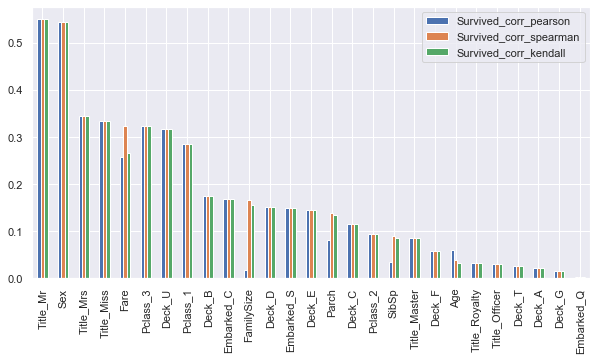

In [46]:
# view how features and survival rate are correlated
train_target_corr.abs().drop(['Survived'], axis=0).sort_values('Survived_corr_spearman', ascending=False).plot(kind='bar', figsize=(10,5));

# _Correlation matrix suggests the first 16 features with absolute correlation values of more than 0.1 for training model. However, multicollinearity problem should also be considered in the next step._ 

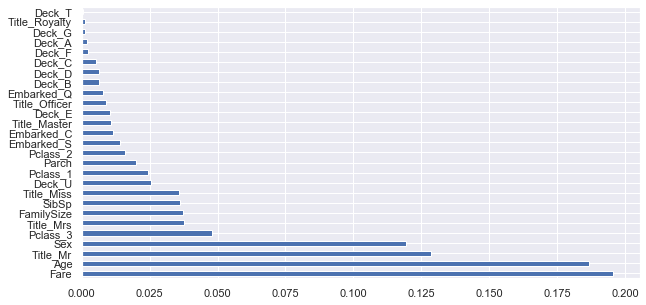

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 5))
plt.show()

In [ ]:
# Chi method

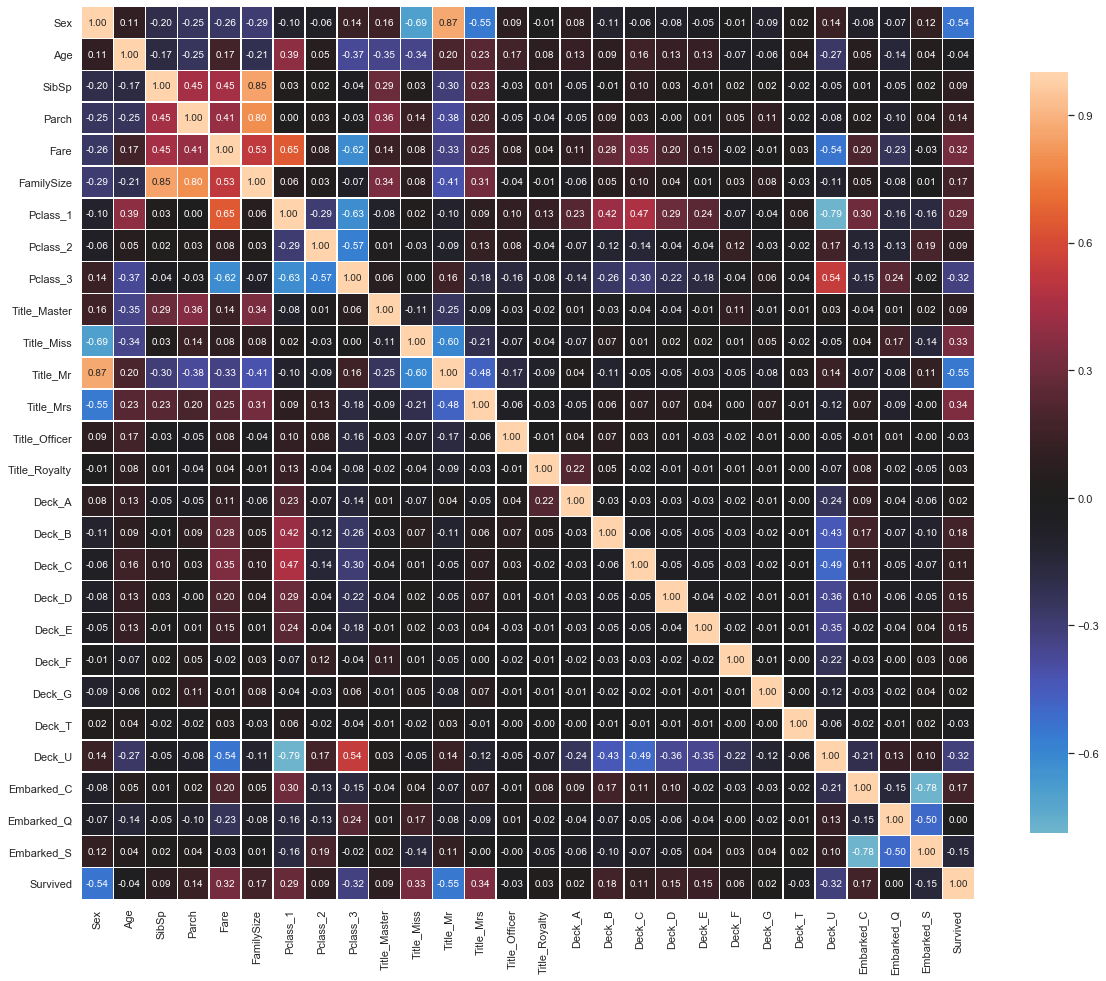

In [34]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_spearman, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

# First let's calculate Variance Inflation Factor (VIF) to check multicollinearlity which happens when two or more features are highly or perfectly correlated such that they can be predicted through a linear relationship. This means that all of these particular features are containing highly similar information and there is very little or no variance in information. 

## VIF is a criteria to check for multicollinearlity problem with following rules of thumb:
### VIF ~ 1 : No risk of multicollinearlity
### VIF > 4 : Model needs further investigation. 
### VIF > 10 : Model suffers from severe multicollinearlity and is not reliable! 

In [42]:
from sklearn import linear_model
multi_linreg = linear_model.LinearRegression()
multi_linreg.fit(X, y)
r_square = multi_linreg.score(X, y)
VIF = 1/(1-r_square)
VIF

1.8385634233960935

## Great! We can safely proceed to modelling phase. However, should there is a multicollinearlity problem, there are some measures to take. The easiest way is to delete or eliminate one of the perfectly correlated features (refer to heatmap). Another way is to use a dimension reduction algorithm such as Principle Component Analysis (PCA).

# IIII. Modelling

In [0]:
# create array for test set
Xtest = test.values

In [0]:
from sklearn.naive_bayes import GaussianNB      #   1. choose model class
model = GaussianNB()                            #   2. instantiate model
model.fit(X, y)                                 #   3. fit model to data
y_model = model.predict(Xtest)                  #   4. predict on new data

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y, y_model))